{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 40000, 'height': 40000, 'count': 1, 'crs': CRS.from_epsg(4326), 'transform': Affine(0.00025, 0.0, -80.0,
       0.0, -0.00025, 50.0), 'blockysize': 1, 'tiled': False, 'compress': 'lzw', 'interleave': 'band'}


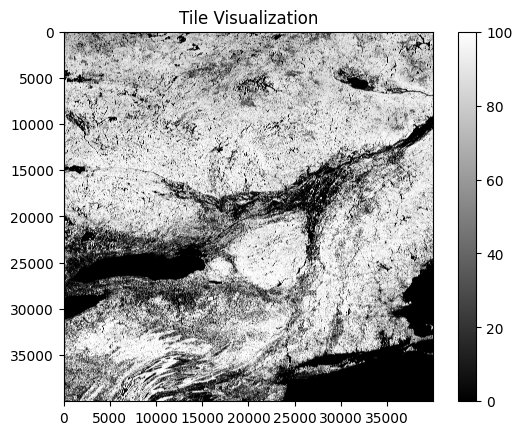

In [1]:
import rasterio
import matplotlib.pyplot as plt

tile_path = 'Hansen_GFC-2023-v1.11_treecover2000_50N_080W.tif'
with rasterio.open(tile_path) as src:
    print(src.profile)
    tile = src.read(1)

plt.imshow(tile, cmap='gray')
plt.colorbar()
plt.title("Tile Visualization")
plt.show()


In [3]:
import numpy as np
#Calculate percentage of area with canopy cover > 50%
threshold = 50
total_pixels = tile.size
covered_pixels = np.sum(tile > threshold)
percentage_covered = (covered_pixels / total_pixels) * 100

print(f"Percentage of area with canopy cover > {threshold}%: {percentage_covered:.2f}%")


Percentage of area with canopy cover > 50%: 64.71%


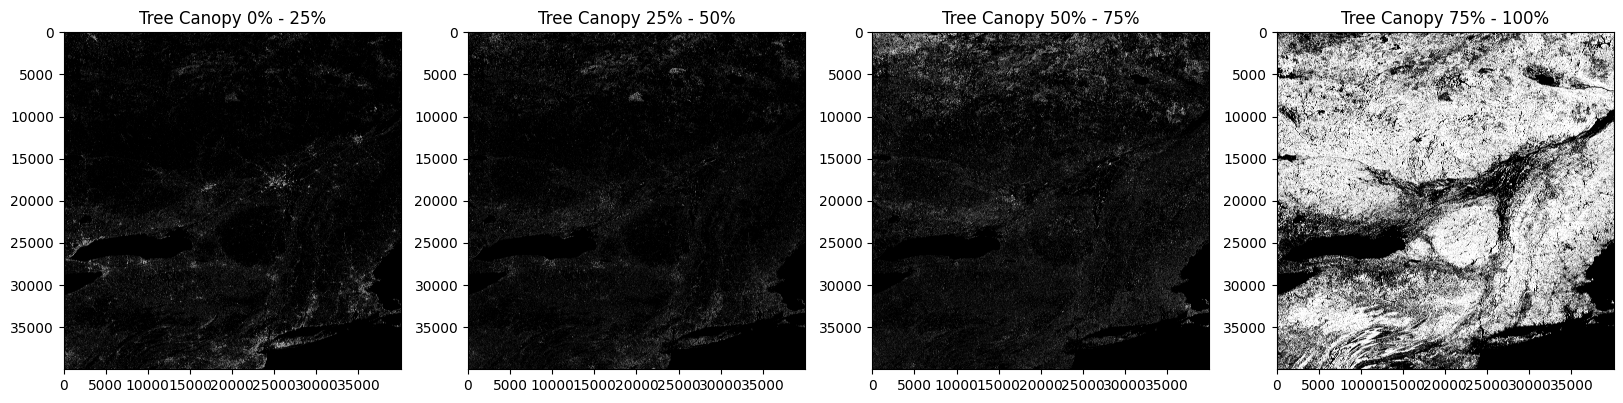

In [4]:
thresholds = [25, 50, 75, 100]

fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# plot of different thresholds
for i, thresh in enumerate(thresholds):
    mask = (tile > (thresh - 25)) & (tile <= thresh)
    axs[i].imshow(mask, cmap='gray')
    axs[i].set_title(f"Tree Canopy {thresh-25}% - {thresh}%")

plt.show()

## Comparing Canopy Tree Cover Across Regions in a Single Tile

In [ ]:
# Split tile into four quadrants
mid_x, mid_y = tile.shape[0] // 2, tile.shape[1] // 2

quadrants = {
    'Top Left': tile[:mid_x, :mid_y],
    'Top Right': tile[:mid_x, mid_y:],
    'Bottom Left': tile[mid_x:, :mid_y],
    'Bottom Right': tile[mid_x:, mid_y:]
}

# Stats for each quadrant
for name, quadrant in quadrants.items():
    mean_cover = np.mean(quadrant)
    print(f"{name} Mean Canopy Cover: {mean_cover:.2f}")


## FCC Data Exploration

In [ ]:
!pip install geopandas
import geopandas as gpd

In [ ]:
# Read the GPKG file\
gdf = gpd.read_file('4GLTE_mobile_broadband_sep2024.gpkg')
gdf